In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [8]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo6a/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo6a/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [9]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_T,Jaro-Winkler_rit,Jaro-Winkler,negT,verbT,negH,verbH,overlap_ent,meteor,clases
0,0.000000,0.000000,2.937,0.000,0.000000,0.000000,0.000000,4,0.000000,0,...,31,0.500000,0.521505,0,,0,,0.500000,0.104519,YES
1,0.000000,0.000000,3.357,0.000,0.000000,0.000000,0.000000,5,0.000000,0,...,31,1.000000,0.720430,0,,0,,0.333333,0.075608,NO
2,0.134561,1.455456,5.030,4.260,3.867700,0.043492,0.465936,5,0.027778,0,...,36,1.000000,0.722222,0,,0,,0.250000,0.161206,UNKNOWN
3,0.000000,0.000000,4.901,0.000,0.000000,0.000000,0.000000,5,0.000000,0,...,48,1.000000,0.701389,0,,0,,0.333333,0.088611,YES
4,0.093520,1.449291,4.266,3.625,3.949965,0.046760,0.381601,5,0.062500,0,...,16,0.714286,0.675413,0,,0,,0.666667,0.199553,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,4.292,0.000,0.000000,0.000000,0.000000,6,0.000000,0,...,20,0.333333,0.477778,0,,0,,0.500000,0.105678,UNKNOWN
796,0.000000,0.000000,4.574,0.000,0.000000,0.000000,0.000000,9,0.000000,0,...,27,1.000000,0.777778,0,,0,,0.666667,0.227941,YES
797,0.000000,0.000000,4.037,0.000,0.000000,0.000000,0.000000,4,0.000000,0,...,23,0.500000,0.528983,0,,0,,0.500000,0.102923,UNKNOWN
798,0.000000,0.000000,4.078,0.000,0.000000,0.000000,0.000000,6,0.000000,0,...,24,0.500000,0.541667,0,,0,,1.000000,0.157963,NO


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

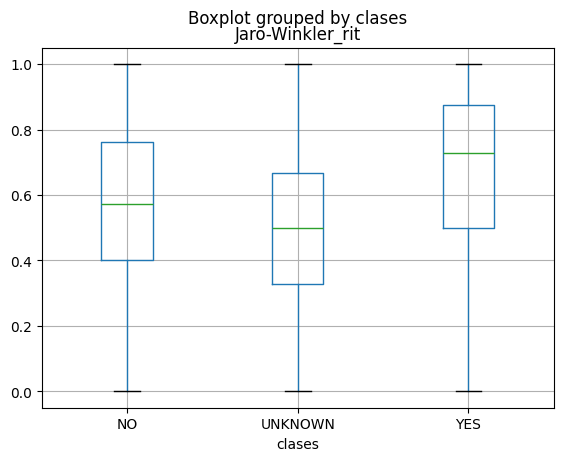

In [10]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [11]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_T,Jaro-Winkler_rit,Jaro-Winkler,negT,verbT,negH,verbH,overlap_ent,meteor,clases
0,0.000000,0.000000,2.937,0.000,0.000000,0.000000,0.000000,4,0.000000,0,...,31,0.500000,0.521505,0,,0,,0.500000,0.104519,YES
1,0.000000,0.000000,3.357,0.000,0.000000,0.000000,0.000000,5,0.000000,0,...,31,1.000000,0.720430,0,,0,,0.333333,0.075608,NO
2,0.134561,1.455456,5.030,4.260,3.867700,0.043492,0.465936,5,0.027778,0,...,36,1.000000,0.722222,0,,0,,0.250000,0.161206,UNKNOWN
3,0.000000,0.000000,4.901,0.000,0.000000,0.000000,0.000000,5,0.000000,0,...,48,1.000000,0.701389,0,,0,,0.333333,0.088611,YES
4,0.093520,1.449291,4.266,3.625,3.949965,0.046760,0.381601,5,0.062500,0,...,16,0.714286,0.675413,0,,0,,0.666667,0.199553,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,4.292,0.000,0.000000,0.000000,0.000000,6,0.000000,0,...,20,0.333333,0.477778,0,,0,,0.500000,0.105678,UNKNOWN
796,0.000000,0.000000,4.574,0.000,0.000000,0.000000,0.000000,9,0.000000,0,...,27,1.000000,0.777778,0,,0,,0.666667,0.227941,YES
797,0.000000,0.000000,4.037,0.000,0.000000,0.000000,0.000000,4,0.000000,0,...,23,0.500000,0.528983,0,,0,,0.500000,0.102923,UNKNOWN
798,0.000000,0.000000,4.078,0.000,0.000000,0.000000,0.000000,6,0.000000,0,...,24,0.500000,0.541667,0,,0,,1.000000,0.157963,NO


In [12]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_T,Jaro-Winkler_rit,Jaro-Winkler,negT,verbT,negH,verbH,overlap_ent,meteor,clases
4,0.093520,1.449291,4.266,3.625,3.949965,0.046760,0.381601,5,0.062500,0,...,16,0.714286,0.675413,0,,0,,0.666667,0.199553,YES
6,0.154332,1.439017,4.385,4.349,4.028956,0.045532,0.420755,7,0.034483,0,...,29,0.500000,0.545957,0,,0,,0.250000,0.188758,YES
16,0.098069,1.411314,5.057,3.642,4.007258,0.013760,0.234625,7,0.043478,1,...,23,0.750000,0.670191,0,,0,,0.750000,0.120929,YES
25,0.081015,1.464642,5.253,4.099,3.944809,0.046484,0.312326,4,0.025641,0,...,39,0.600000,0.558974,0,,0,,0.666667,0.064430,YES
27,0.016294,1.481927,4.635,3.384,3.949444,0.045214,0.147491,4,0.050000,0,...,20,0.200000,0.416667,0,,0,,0.333333,0.115115,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.064967,1.453204,4.901,3.594,3.946730,0.011338,0.219934,7,0.047619,0,...,21,0.875000,0.736111,0,,0,,0.750000,0.197491,YES
776,0.085706,1.461923,4.921,4.220,3.883105,0.044246,0.351426,6,0.041667,0,...,24,0.857143,0.702135,0,,0,,0.500000,0.201613,YES
783,0.140874,2.907685,4.793,4.240,3.947341,0.045889,0.418931,6,0.133333,0,...,15,0.625000,0.652709,0,,0,,0.333333,0.229630,YES
791,0.116091,4.419289,5.078,4.901,3.997382,0.011912,0.400907,6,0.136364,0,...,22,0.666667,0.646461,1,make,0,,0.250000,0.197551,YES


In [13]:
len(train.columns)

22

In [14]:
train=train.drop(["verbT","verbH"],axis=1)

In [15]:
len(train.columns)-1

19

In [16]:
#train = train[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,Jaro-Winkler,negT,negH,overlap_ent,meteor,clases
0,0.000000,0.000000,2.937,0.000,0.000000,0.000000,0.000000,4,0.000000,0,4,0,31,0.500000,0.521505,0,0,0.500000,0.104519,YES
1,0.000000,0.000000,3.357,0.000,0.000000,0.000000,0.000000,5,0.000000,0,5,0,31,1.000000,0.720430,0,0,0.333333,0.075608,NO
2,0.134561,1.455456,5.030,4.260,3.867700,0.043492,0.465936,5,0.027778,0,6,1,36,1.000000,0.722222,0,0,0.250000,0.161206,UNKNOWN
3,0.000000,0.000000,4.901,0.000,0.000000,0.000000,0.000000,5,0.000000,0,5,0,48,1.000000,0.701389,0,0,0.333333,0.088611,YES
4,0.093520,1.449291,4.266,3.625,3.949965,0.046760,0.381601,5,0.062500,0,7,1,16,0.714286,0.675413,0,0,0.666667,0.199553,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,4.292,0.000,0.000000,0.000000,0.000000,6,0.000000,0,6,0,20,0.333333,0.477778,0,0,0.500000,0.105678,UNKNOWN
796,0.000000,0.000000,4.574,0.000,0.000000,0.000000,0.000000,9,0.000000,0,9,0,27,1.000000,0.777778,0,0,0.666667,0.227941,YES
797,0.000000,0.000000,4.037,0.000,0.000000,0.000000,0.000000,4,0.000000,0,4,0,23,0.500000,0.528983,0,0,0.500000,0.102923,UNKNOWN
798,0.000000,0.000000,4.078,0.000,0.000000,0.000000,0.000000,6,0.000000,0,6,0,24,0.500000,0.541667,0,0,1.000000,0.157963,NO


In [17]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [18]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [19]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,Jaro-Winkler,negT,negH,overlap_ent,meteor
sumas,1.000000,0.427579,0.222745,0.799366,0.797888,0.561576,0.847198,-0.153608,0.381687,0.178429,0.149901,0.418346,-0.133087,-0.217726,-0.120916,-0.034475,0.026997,-0.165824,-0.094863
distancias,0.427579,1.000000,0.210229,0.672939,0.566370,0.449703,0.449475,-0.256074,0.840752,0.163233,0.460209,0.998634,-0.070924,-0.431080,-0.268184,-0.049555,0.002257,-0.360259,-0.157894
entropia_total,0.222745,0.210229,1.000000,0.280215,0.223269,-0.001153,0.223921,0.235303,0.112594,0.053427,0.348830,0.194609,0.221679,-0.015219,0.033287,0.094001,0.027346,-0.006312,0.024299
entropias,0.799366,0.672939,0.280215,1.000000,0.976671,0.726639,0.847183,-0.288015,0.537462,0.151562,0.198159,0.659100,-0.024923,-0.349404,-0.226026,-0.063045,0.031294,-0.312460,-0.218161
mutinf,0.797888,0.566370,0.223269,0.976671,1.000000,0.728650,0.850781,-0.280180,0.464155,0.124173,0.129266,0.550857,-0.069373,-0.308633,-0.198002,-0.068869,0.027949,-0.280573,-0.201547
mearts,0.561576,0.449703,-0.001153,0.726639,0.728650,1.000000,0.653053,-0.240539,0.308217,0.122609,0.097117,0.453900,0.074751,-0.225226,-0.161567,-0.071862,0.049206,-0.244990,-0.217348
max_info,0.847198,0.449475,0.223921,0.847183,0.850781,0.653053,1.000000,-0.221574,0.343745,0.178606,0.103238,0.437155,-0.003904,-0.234215,-0.155320,-0.039720,0.038718,-0.190650,-0.178500
list_comp,-0.153608,-0.256074,0.235303,-0.288015,-0.280180,-0.240539,-0.221574,1.000000,-0.235235,-0.038846,0.733631,-0.255834,0.109381,0.320411,0.399710,0.048533,0.085839,0.367138,0.653400
diferencias,0.381687,0.840752,0.112594,0.537462,0.464155,0.308217,0.343745,-0.235235,1.000000,0.141051,0.370593,0.842566,-0.338341,-0.404361,-0.218962,-0.077163,-0.000053,-0.303897,-0.019078
list_incomp,0.178429,0.163233,0.053427,0.151562,0.124173,0.122609,0.178606,-0.038846,0.141051,1.000000,0.074760,0.164438,0.013381,-0.041115,-0.013613,0.019436,-0.014822,0.016216,-0.057191


<Axes: >

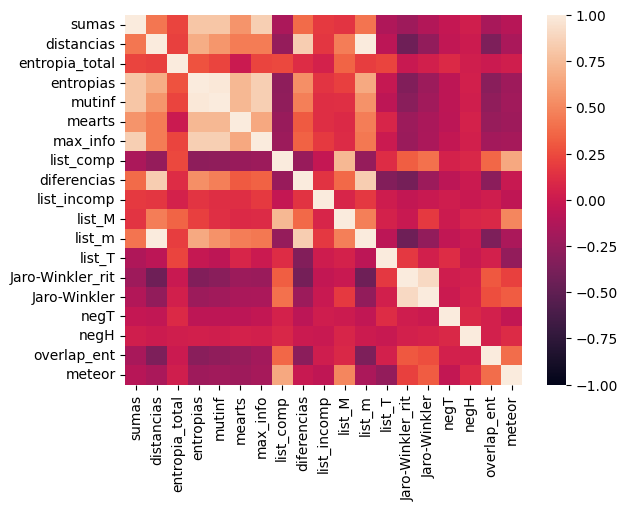

In [20]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [21]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,Jaro-Winkler,negT,negH,overlap_ent,meteor
sumas,1.000000,0.427579,0.222745,0.799366,0.797888,0.561576,0.847198,-0.153608,0.381687,0.178429,0.149901,0.418346,-0.133087,-0.217726,-0.120916,-0.034475,0.026997,-0.165824,-0.094863
distancias,0.427579,1.000000,0.210229,0.672939,0.566370,0.449703,0.449475,-0.256074,0.840752,0.163233,0.460209,0.998634,-0.070924,-0.431080,-0.268184,-0.049555,0.002257,-0.360259,-0.157894
entropia_total,0.222745,0.210229,1.000000,0.280215,0.223269,-0.001153,0.223921,0.235303,0.112594,0.053427,0.348830,0.194609,0.221679,-0.015219,0.033287,0.094001,0.027346,-0.006312,0.024299
entropias,0.799366,0.672939,0.280215,1.000000,0.976671,0.726639,0.847183,-0.288015,0.537462,0.151562,0.198159,0.659100,-0.024923,-0.349404,-0.226026,-0.063045,0.031294,-0.312460,-0.218161
mutinf,0.797888,0.566370,0.223269,0.976671,1.000000,0.728650,0.850781,-0.280180,0.464155,0.124173,0.129266,0.550857,-0.069373,-0.308633,-0.198002,-0.068869,0.027949,-0.280573,-0.201547
mearts,0.561576,0.449703,-0.001153,0.726639,0.728650,1.000000,0.653053,-0.240539,0.308217,0.122609,0.097117,0.453900,0.074751,-0.225226,-0.161567,-0.071862,0.049206,-0.244990,-0.217348
max_info,0.847198,0.449475,0.223921,0.847183,0.850781,0.653053,1.000000,-0.221574,0.343745,0.178606,0.103238,0.437155,-0.003904,-0.234215,-0.155320,-0.039720,0.038718,-0.190650,-0.178500
list_comp,-0.153608,-0.256074,0.235303,-0.288015,-0.280180,-0.240539,-0.221574,1.000000,-0.235235,-0.038846,0.733631,-0.255834,0.109381,0.320411,0.399710,0.048533,0.085839,0.367138,0.653400
diferencias,0.381687,0.840752,0.112594,0.537462,0.464155,0.308217,0.343745,-0.235235,1.000000,0.141051,0.370593,0.842566,-0.338341,-0.404361,-0.218962,-0.077163,-0.000053,-0.303897,-0.019078
list_incomp,0.178429,0.163233,0.053427,0.151562,0.124173,0.122609,0.178606,-0.038846,0.141051,1.000000,0.074760,0.164438,0.013381,-0.041115,-0.013613,0.019436,-0.014822,0.016216,-0.057191


In [22]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [23]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    elif i == "UNKNOWN":
        y_train.append(2)
    else:
        y_train.append(0)

In [24]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

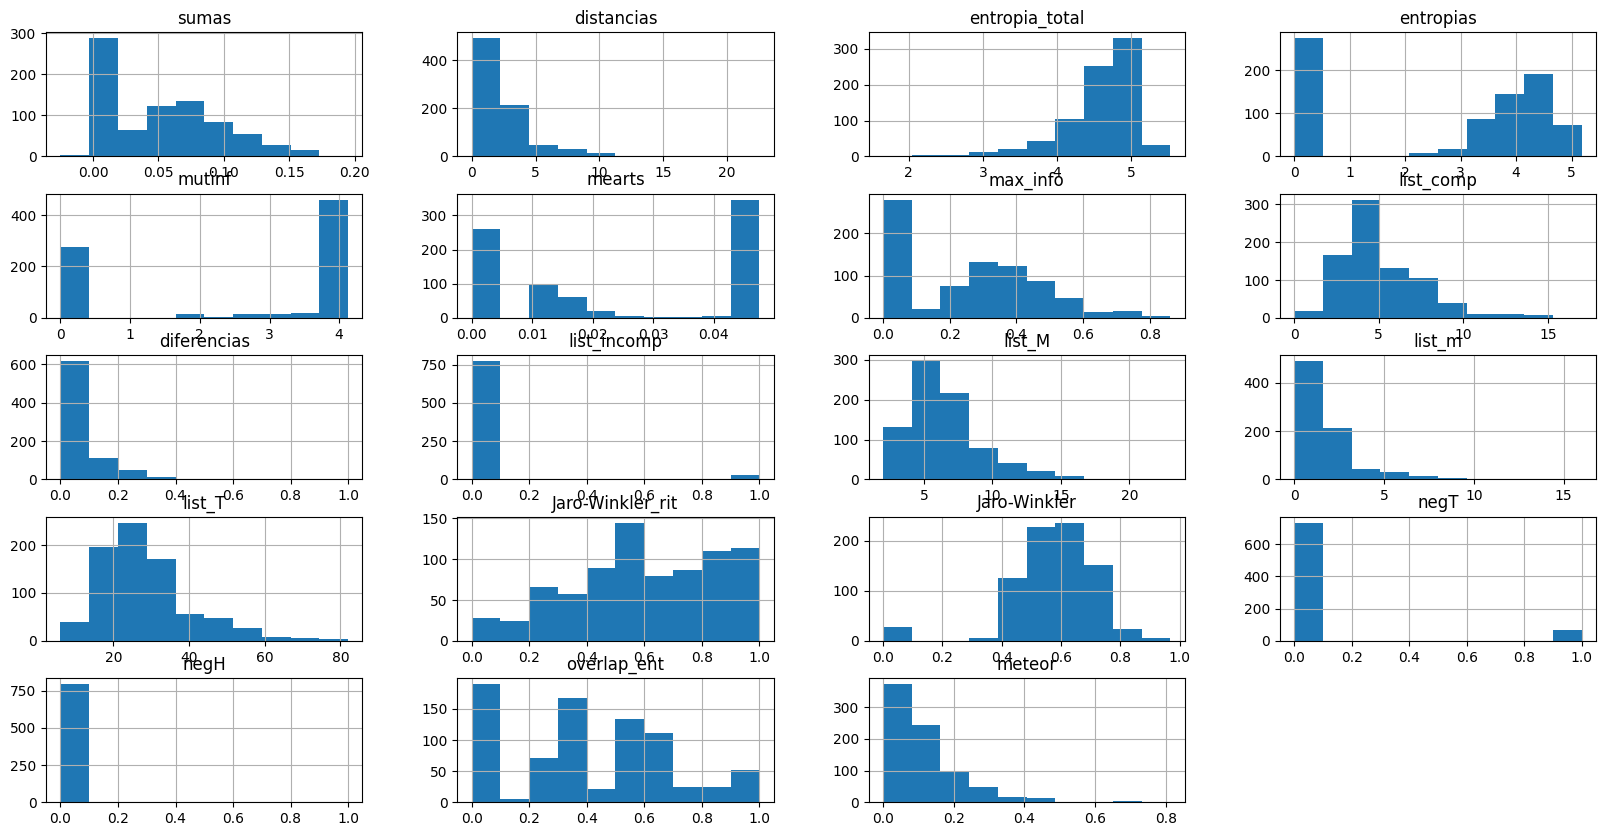

In [25]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [26]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo6a/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo6a/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [27]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_T,Jaro-Winkler_rit,Jaro-Winkler,negT,verbT,negH,verbH,overlap_ent,meteor,clases
0,0.107902,1.459337,4.952,4.187,4.083356,0.046638,0.386167,5,0.033333,0,...,30,0.333333,0.466667,0,,0,,0.666667,0.082721,YES
1,0.107902,1.459337,4.871,4.187,4.083356,0.046638,0.386167,5,0.033333,0,...,30,0.666667,0.600000,0,,0,,0.333333,0.137061,YES
2,0.000000,0.000000,3.002,0.000,0.000000,0.000000,0.000000,4,0.000000,0,...,16,0.500000,0.541651,0,,0,,0.666667,0.028571,YES
3,0.000000,0.000000,4.268,0.000,0.000000,0.000000,0.000000,7,0.000000,0,...,28,0.714286,0.630950,0,,0,,1.000000,0.215659,YES
4,0.038840,1.466158,4.130,3.825,3.880129,0.045985,0.201056,4,0.035714,0,...,28,0.200000,0.411905,0,,0,,1.000000,0.090818,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.186610,1.443651,4.853,3.969,3.839593,0.012526,0.490698,4,0.043478,1,...,23,0.400000,0.495571,1,rush,0,,0.500000,0.082172,YES
796,0.000000,0.000000,3.602,0.000,0.000000,0.000000,0.000000,6,0.000000,0,...,30,0.666667,0.600000,0,,0,,0.333333,0.075911,NO
797,0.095314,1.483826,4.794,4.248,4.049162,0.046892,0.379560,4,0.030303,0,...,33,0.000000,0.000000,0,,0,,0.666667,0.166744,UNKNOWN
798,0.000000,0.000000,4.666,0.000,0.000000,0.000000,0.000000,5,0.000000,0,...,16,0.600000,0.595833,0,,0,,0.666667,0.124465,UNKNOWN


In [28]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [29]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,Jaro-Winkler,negT,negH,overlap_ent,meteor,clases
0,0.107902,1.459337,4.952,4.187,4.083356,0.046638,0.386167,5,0.033333,0,6,1,30,0.333333,0.466667,0,0,0.666667,0.082721,YES
1,0.107902,1.459337,4.871,4.187,4.083356,0.046638,0.386167,5,0.033333,0,6,1,30,0.666667,0.600000,0,0,0.333333,0.137061,YES
2,0.000000,0.000000,3.002,0.000,0.000000,0.000000,0.000000,4,0.000000,0,4,0,16,0.500000,0.541651,0,0,0.666667,0.028571,YES
3,0.000000,0.000000,4.268,0.000,0.000000,0.000000,0.000000,7,0.000000,0,7,0,28,0.714286,0.630950,0,0,1.000000,0.215659,YES
4,0.038840,1.466158,4.130,3.825,3.880129,0.045985,0.201056,4,0.035714,0,5,1,28,0.200000,0.411905,0,0,1.000000,0.090818,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.186610,1.443651,4.853,3.969,3.839593,0.012526,0.490698,4,0.043478,1,5,1,23,0.400000,0.495571,1,0,0.500000,0.082172,YES
796,0.000000,0.000000,3.602,0.000,0.000000,0.000000,0.000000,6,0.000000,0,6,0,30,0.666667,0.600000,0,0,0.333333,0.075911,NO
797,0.095314,1.483826,4.794,4.248,4.049162,0.046892,0.379560,4,0.030303,0,5,1,33,0.000000,0.000000,0,0,0.666667,0.166744,UNKNOWN
798,0.000000,0.000000,4.666,0.000,0.000000,0.000000,0.000000,5,0.000000,0,5,0,16,0.600000,0.595833,0,0,0.666667,0.124465,UNKNOWN


In [30]:
test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

(29, 20)

In [31]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [32]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    elif i == "UNKNOWN":
        y_test.append(2)
    else:
        y_test.append(0)

In [33]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [34]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.53091106, ..., 0.        , 0.5       ,
        0.1284507 ],
       [0.        , 0.        , 0.60683297, ..., 0.        , 0.33333333,
        0.09291981],
       [0.69019084, 0.06461783, 0.90925524, ..., 0.        , 0.25      ,
        0.19811614],
       ...,
       [0.        , 0.        , 0.72975416, ..., 0.        , 0.5       ,
        0.12648891],
       [0.        , 0.        , 0.73716558, ..., 0.        , 1.        ,
        0.19413063],
       [0.64730025, 0.06454064, 0.86695589, ..., 0.        , 0.66666667,
        0.12392723]])

In [35]:
X_train.shape

(800, 19)

In [36]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [37]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [38]:
model.decision_function(X_train)

array([[-0.64269843,  0.99621446, -0.35351603],
       [-1.03714348,  1.42975351, -0.39261003],
       [-1.35966495,  1.43297596, -0.07331101],
       ...,
       [-0.6279189 ,  0.83094806, -0.20302915],
       [-0.35667068,  1.11698428, -0.7603136 ],
       [-0.72549746,  0.80730967, -0.08181222]])

In [39]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'Jaro-Winkler',
       'negT', 'negH', 'overlap_ent', 'meteor'],
      dtype='object')

In [40]:
model.classes_

array([0, 1, 2])

In [41]:
model.coef_[0]

array([-0.27573233, -0.38781863, -0.33912316, -0.57422232, -0.16743132,
        0.80078375, -0.10250992, -0.07592184, -0.31409955,  0.42897154,
       -0.24144053, -0.3615758 , -0.81879546, -0.68618314,  0.49524029,
        0.52722421,  1.02019582,  0.51160239,  0.75978553])

In [42]:
coeficientes=model.coef_[0]

In [43]:
coeficientes

array([-0.27573233, -0.38781863, -0.33912316, -0.57422232, -0.16743132,
        0.80078375, -0.10250992, -0.07592184, -0.31409955,  0.42897154,
       -0.24144053, -0.3615758 , -0.81879546, -0.68618314,  0.49524029,
        0.52722421,  1.02019582,  0.51160239,  0.75978553])

In [44]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  16 negH 12 list_T


In [45]:

n_columns=train.shape[1]-1

In [46]:
n_columns

19

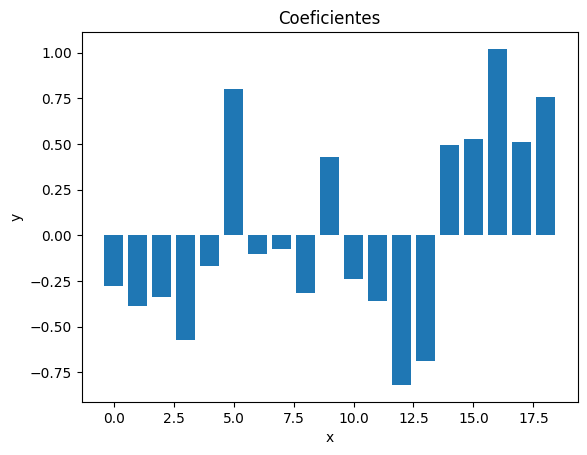

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [48]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.41308547, 0.09071585, 0.92198846, ..., 0.        , 0.66666667,
        0.1051077 ],
       [0.41308547, 0.09071585, 0.90690747, ..., 0.        , 0.33333333,
        0.17415506],
       [0.        , 0.        , 0.55892757, ..., 0.        , 0.66666667,
        0.03630387],
       ...,
       [0.36489488, 0.09223812, 0.89257122, ..., 0.        , 0.66666667,
        0.21187087],
       [0.        , 0.        , 0.86873953, ..., 0.        , 0.66666667,
        0.15814977],
       [0.86071442, 0.08698264, 0.99031838, ..., 0.        , 1.        ,
        0.85363562]])

In [49]:
X_test.shape

(800, 19)

In [50]:
predictions = model.predict(X_test)

In [51]:
predictions

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,

In [52]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,Jaro-Winkler,negT,negH,overlap_ent,meteor,clases,predicciones
0,0.107902,1.459337,4.952,4.187,4.083356,0.046638,0.386167,5,0.033333,0,...,1,30,0.333333,0.466667,0,0,0.666667,0.082721,YES,1
1,0.107902,1.459337,4.871,4.187,4.083356,0.046638,0.386167,5,0.033333,0,...,1,30,0.666667,0.600000,0,0,0.333333,0.137061,YES,1
2,0.000000,0.000000,3.002,0.000,0.000000,0.000000,0.000000,4,0.000000,0,...,0,16,0.500000,0.541651,0,0,0.666667,0.028571,YES,1
3,0.000000,0.000000,4.268,0.000,0.000000,0.000000,0.000000,7,0.000000,0,...,0,28,0.714286,0.630950,0,0,1.000000,0.215659,YES,1
4,0.038840,1.466158,4.130,3.825,3.880129,0.045985,0.201056,4,0.035714,0,...,1,28,0.200000,0.411905,0,0,1.000000,0.090818,NO,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.186610,1.443651,4.853,3.969,3.839593,0.012526,0.490698,4,0.043478,1,...,1,23,0.400000,0.495571,1,0,0.500000,0.082172,YES,1
796,0.000000,0.000000,3.602,0.000,0.000000,0.000000,0.000000,6,0.000000,0,...,0,30,0.666667,0.600000,0,0,0.333333,0.075911,NO,1
797,0.095314,1.483826,4.794,4.248,4.049162,0.046892,0.379560,4,0.030303,0,...,1,33,0.000000,0.000000,0,0,0.666667,0.166744,UNKNOWN,1
798,0.000000,0.000000,4.666,0.000,0.000000,0.000000,0.000000,5,0.000000,0,...,0,16,0.600000,0.595833,0,0,0.666667,0.124465,UNKNOWN,1


In [53]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,Jaro-Winkler,negT,negH,overlap_ent,meteor,clases,predicciones
288,0.092363,2.889693,4.672,3.998,3.771382,0.013146,0.513491,3,0.153846,0,...,2,13,0.8,0.702076,1,1,0.75,0.175265,YES,0


In [54]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.64
precision:  0.65
recall 0.64
f1_score:  0.61
matthews_score:  0.33


In [55]:
X_train.shape

(800, 19)

In [56]:
X_test.shape

(800, 19)

In [57]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [58]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [59]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Logistic Regression Acurracy:: 0.660000 (0.110651)
Logistic Regression Precision:: 0.610000 (0.160322)
Logistic Regression Recall:: 0.660000 (0.110651)
Logistic Regression F1-score:: 0.620000 (0.142393)


In [60]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Logistic Regression: 0.350000 (0.217431)


In [61]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [119]:
#linear_model

In [120]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [62]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.04      0.08        72
           1       0.66      0.72      0.69       410
           2       0.61      0.67      0.64       318

    accuracy                           0.64       800
   macro avg       0.67      0.48      0.47       800
weighted avg       0.65      0.64      0.61       800



In [70]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [71]:
test.columns[:-2]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'Jaro-Winkler',
       'negT', 'negH', 'overlap_ent', 'meteor'],
      dtype='object')

In [72]:
explainer.expected_value

array([-0.96032441,  0.4932811 ,  0.46704331])

In [73]:
X_test

array([[0.41308547, 0.09071585, 0.92198846, ..., 0.        , 0.66666667,
        0.1051077 ],
       [0.41308547, 0.09071585, 0.90690747, ..., 0.        , 0.33333333,
        0.17415506],
       [0.        , 0.        , 0.55892757, ..., 0.        , 0.66666667,
        0.03630387],
       ...,
       [0.36489488, 0.09223812, 0.89257122, ..., 0.        , 0.66666667,
        0.21187087],
       [0.        , 0.        , 0.86873953, ..., 0.        , 0.66666667,
        0.15814977],
       [0.86071442, 0.08698264, 0.99031838, ..., 0.        , 1.        ,
        0.85363562]])

In [74]:
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [68]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.         0.         0.44482058 0.         0.         0.
 0.         0.16666667 0.         0.         0.29411765 0.
 0.39285714 1.         0.         0.        ] 2 1


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

[0.         0.         0.57684496 0.         0.         0.
 0.         0.         0.         0.         0.29411765 0.
 0.42857143 1.         0.         0.        ]


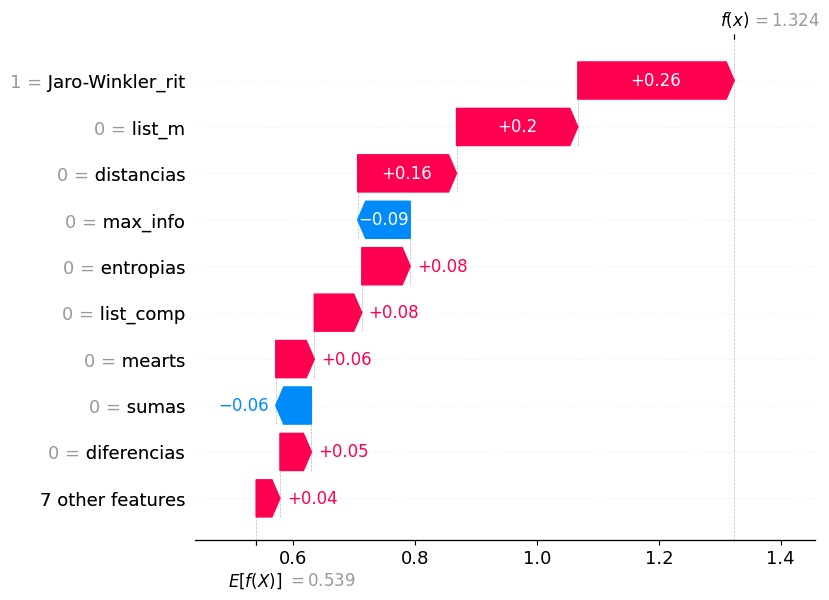

In [69]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

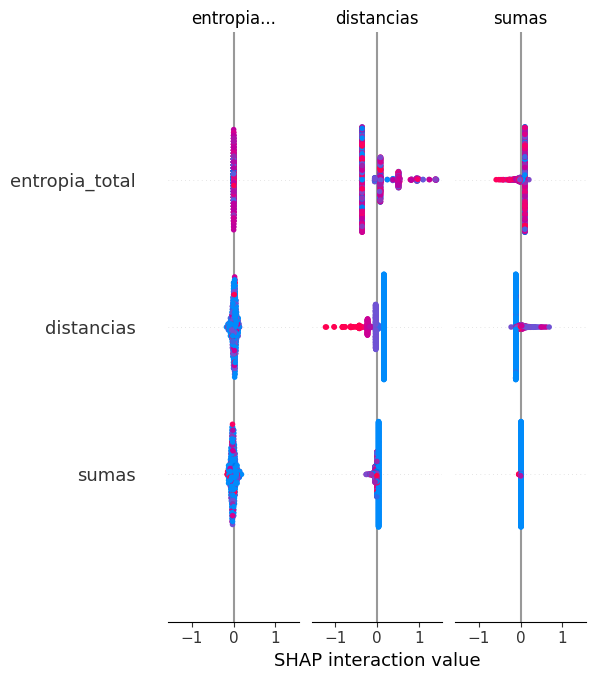

In [70]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

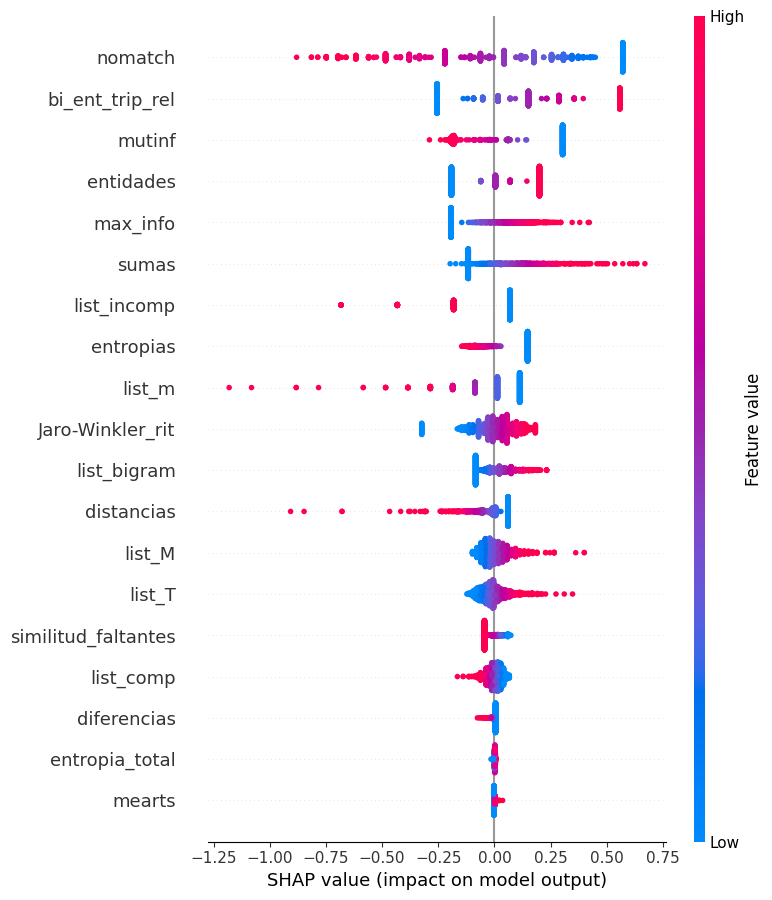

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

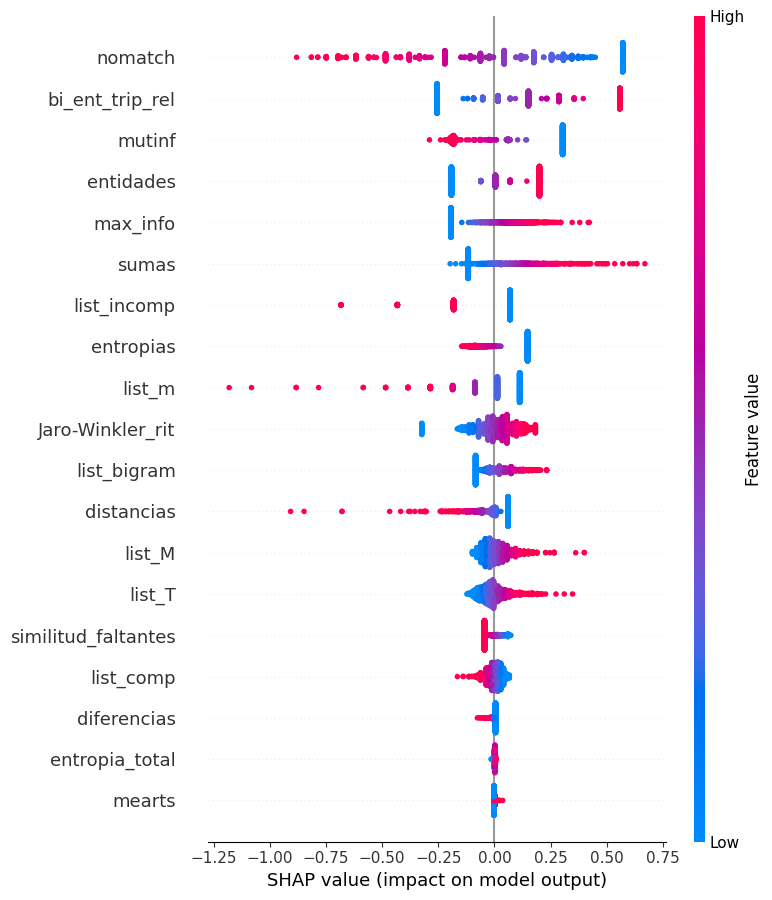

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

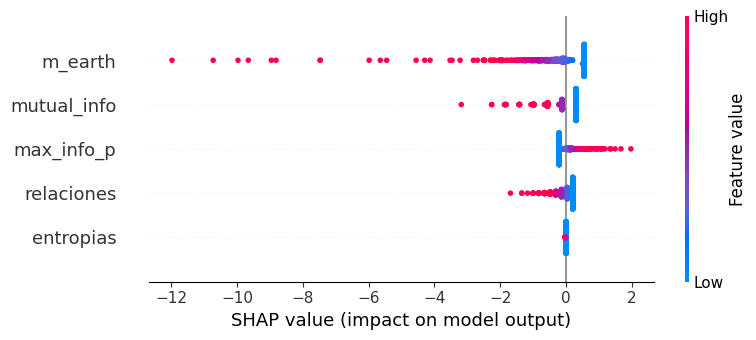

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


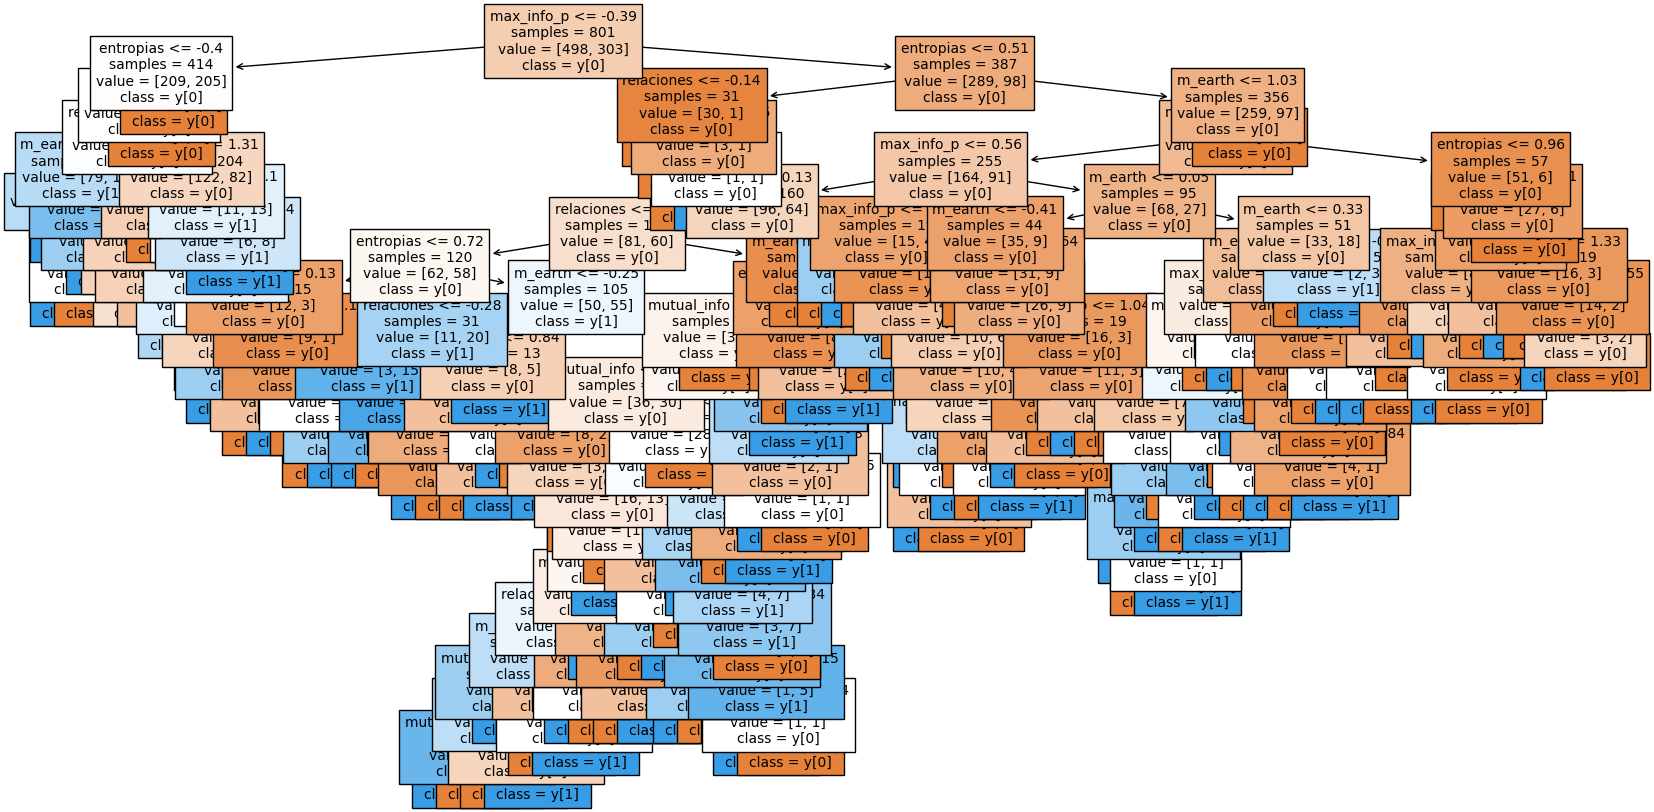

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )